# Metrics for sentiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
inception_annotations_path = "D:\ITU\DataintheWild\Project-Dec07\DITW_project-master\/data/twitter/inception/inception_annotations_final.csv"
inception_model_sentiment_path = "D:\ITU\DataintheWild\Project-Dec07\DITW_project-master\/data/twitter/inception/subset_inception_sentiment.csv"

little_mermaid_annotations_path = "D:\ITU\DataintheWild\Project-Dec07\DITW_project-master\/data/twitter/little_mermaid/little_mermaid_annotations_final.csv"
little_mermaid_model_sentiment_path = "D:\ITU\DataintheWild\Project-Dec07\DITW_project-master\/data/twitter/little_mermaid/subset_little_mermaid_sentiment.csv"

thewitcher_annotations_path = "D:\ITU\DataintheWild\Project-Dec07\DITW_project-master\/data/twitter/thewitcher/thewitcher_annotations_final.csv"
thewitcher_model_sentiment_path = "D:\ITU\DataintheWild\Project-Dec07\DITW_project-master\/data/twitter/thewitcher/subset_thewitcher_sentiment.csv"

wolf_of_wall_street_annotations_path = "D:\ITU\DataintheWild\Project-Dec07\DITW_project-master\/data/twitter/wolf_of_wall_street/wolf_of_wall_street_annotations_final.csv"
wolf_of_wall_street_model_sentiment_path = "D:\ITU\DataintheWild\Project-Dec07\DITW_project-master\data/twitter/wolf_of_wall_street/subset_wolf_of_wall_street_sentiment.csv"

In [9]:
inception_annotations = pd.read_csv(inception_annotations_path)
inception_model_sentiment = pd.read_csv(inception_model_sentiment_path, sep='\t')
inception_model_sentiment = inception_model_sentiment[["text", "negative", "neutral", "positive"]]

little_mermaid_annotations = pd.read_csv(little_mermaid_annotations_path)
little_mermaid_model_sentiment = pd.read_csv(little_mermaid_model_sentiment_path, sep='\t')
little_mermaid_model_sentiment = little_mermaid_model_sentiment[["text", "negative", "neutral", "positive"]]

thewitcher_annotations = pd.read_csv(thewitcher_annotations_path)
thewitcher_model_sentiment = pd.read_csv(thewitcher_model_sentiment_path, sep='\t')
thewitcher_model_sentiment = thewitcher_model_sentiment[["text", "negative", "neutral", "positive"]]

wolf_of_wall_street_annotations = pd.read_csv(wolf_of_wall_street_annotations_path)
wolf_of_wall_street_model_sentiment = pd.read_csv(wolf_of_wall_street_model_sentiment_path, sep='\t')
wolf_of_wall_street_model_sentiment = wolf_of_wall_street_model_sentiment[["text", "negative", "neutral", "positive"]]

In [10]:
inception_annotations.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'author_id',
       'like_count', 'quote_count', 'reply_count', 'retweet_count',
       'referenced_tweet_id', 'referenced_tweet_type', 'text', 'sentiment',
       'annotator', 'annotation_id', 'created_at', 'updated_at', 'lead_time'],
      dtype='object')

In [11]:
inception_annotations = inception_annotations[["text", "sentiment"]]
little_mermaid_annotations = little_mermaid_annotations[["text", "sentiment"]]
thewitcher_annotations = thewitcher_annotations[["text", "sentiment"]]
wolf_of_wall_street_annotations = wolf_of_wall_street_annotations[["text", "sentiment"]]

In [12]:
print(inception_annotations["sentiment"].unique())
print(little_mermaid_annotations["sentiment"].unique())
print(thewitcher_annotations["sentiment"].unique())
print(wolf_of_wall_street_annotations["sentiment"].unique())

['positive' 'neutral' 'negative' 'negative-racial']
['neutral' 'positive' 'negative' nan]
['positive' 'neutral' 'negative-racial' 'negative' 'positive-racial']
['Neutral' 'Positive' 'Negative']


In [13]:
mapping = {
    "Neutral": "neutral",
    "Negative": "negative",
    "Positive": "positive",
    "neutral": "neutral",
    "negative": "negative",
    "positive": "positive",
    "positive-racial": "positive",
    "negative-racial": "negative"
}

In [14]:
inception_annotations["annotation"] = inception_annotations["sentiment"].map(mapping)
little_mermaid_annotations["annotation"] = little_mermaid_annotations["sentiment"].map(mapping)
thewitcher_annotations["annotation"] = thewitcher_annotations["sentiment"].map(mapping)
wolf_of_wall_street_annotations["annotation"] = wolf_of_wall_street_annotations["sentiment"].map(mapping)

In [15]:
inception_annotations = inception_annotations[["text", "annotation"]]
little_mermaid_annotations = little_mermaid_annotations[["text", "annotation"]]
thewitcher_annotations = thewitcher_annotations[["text", "annotation"]]
wolf_of_wall_street_annotations = wolf_of_wall_street_annotations[["text", "annotation"]]

In [16]:
inception_annotations

,text,annotation
0,Add #Inception To That Apartment's Movie Libra...,positive
1,"@raeanne23 decaprio, since he was just in #Inc...",neutral
2,Ok I wana go 2 da movies 2 see #Inception also!,positive
3,FINALLY seeing #Inception !!,neutral
4,Batman 3 News! http://tinyurl.com/yh65d29 #bat...,neutral
...,...,...
475,Okay I think I am officially the last person t...,positive
476,Do you think #Inception deserves this promotio...,neutral
477,@STEFisdope lol idk if i truely remember or u ...,neutral
478,Michael Caine discusses #Inception ending on B...,neutral


In [17]:
inception_model_sentiment

,text,negative,neutral,positive
0,Christopher's Nolan's #Inception http://bit.ly...,0.0060,0.9207,0.0733
1,"""Your Mind Is the Scene of the Crime"" is the b...",0.0233,0.1530,0.8237
2,"Inception teaser trailer looks pretty cool, ne...",0.0013,0.0205,0.9781
3,INCEPTION trailer is the coolest I've seen thi...,0.0021,0.0120,0.9859
4,Finally a movie that has the potential to outd...,0.0022,0.0694,0.9285
...,...,...,...,...
476,Lol same here XD RT “@HaifaAlAlSheikh: Last ti...,0.0588,0.6751,0.2660
477,Plan A (pizza and #inception) is done. Now tim...,0.0042,0.6786,0.3172
478,Crazy dream has had me thinking all morning. #...,0.3948,0.5437,0.0615
479,Bout to watch #inception,0.0146,0.8575,0.1279


In [18]:
merged_inception = (inception_model_sentiment.merge(inception_annotations, on="text")).drop_duplicates()
merged_little_mermaid = (little_mermaid_model_sentiment.merge(little_mermaid_annotations, on="text")).drop_duplicates()
merged_thewitcher = (thewitcher_model_sentiment.merge(thewitcher_annotations, on="text")).drop_duplicates()
merged_wolf_of_wall_street = (wolf_of_wall_street_model_sentiment.merge(wolf_of_wall_street_annotations, on="text")).drop_duplicates()

In [19]:
merged_inception

,text,negative,neutral,positive,annotation
0,Christopher's Nolan's #Inception http://bit.ly...,0.0060,0.9207,0.0733,neutral
1,"""Your Mind Is the Scene of the Crime"" is the b...",0.0233,0.1530,0.8237,neutral
2,"Inception teaser trailer looks pretty cool, ne...",0.0013,0.0205,0.9781,positive
3,INCEPTION trailer is the coolest I've seen thi...,0.0021,0.0120,0.9859,positive
4,Finally a movie that has the potential to outd...,0.0022,0.0694,0.9285,positive
...,...,...,...,...,...
496,Lol same here XD RT “@HaifaAlAlSheikh: Last ti...,0.0588,0.6751,0.2660,neutral
497,Plan A (pizza and #inception) is done. Now tim...,0.0042,0.6786,0.3172,neutral
498,Crazy dream has had me thinking all morning. #...,0.3948,0.5437,0.0615,neutral
499,Bout to watch #inception,0.0146,0.8575,0.1279,neutral


In [20]:
# pick column name with the highest value
merged_inception["model_output"] = merged_inception[["negative", "neutral", "positive"]].idxmax(axis=1)
merged_little_mermaid["model_output"] = merged_little_mermaid[["negative", "neutral", "positive"]].idxmax(axis=1)
merged_thewitcher["model_output"] = merged_thewitcher[["negative", "neutral", "positive"]].idxmax(axis=1)
merged_wolf_of_wall_street["model_output"] = merged_wolf_of_wall_street[["negative", "neutral", "positive"]].idxmax(axis=1)

In [21]:
merged_inception

,text,negative,neutral,positive,annotation,model_output
0,Christopher's Nolan's #Inception http://bit.ly...,0.0060,0.9207,0.0733,neutral,neutral
1,"""Your Mind Is the Scene of the Crime"" is the b...",0.0233,0.1530,0.8237,neutral,positive
2,"Inception teaser trailer looks pretty cool, ne...",0.0013,0.0205,0.9781,positive,positive
3,INCEPTION trailer is the coolest I've seen thi...,0.0021,0.0120,0.9859,positive,positive
4,Finally a movie that has the potential to outd...,0.0022,0.0694,0.9285,positive,positive
...,...,...,...,...,...,...
496,Lol same here XD RT “@HaifaAlAlSheikh: Last ti...,0.0588,0.6751,0.2660,neutral,neutral
497,Plan A (pizza and #inception) is done. Now tim...,0.0042,0.6786,0.3172,neutral,neutral
498,Crazy dream has had me thinking all morning. #...,0.3948,0.5437,0.0615,neutral,neutral
499,Bout to watch #inception,0.0146,0.8575,0.1279,neutral,neutral


In [22]:
merged_inception['match'] = merged_inception.annotation.eq(merged_inception.model_output)
merged_little_mermaid['match'] = merged_little_mermaid.annotation.eq(merged_little_mermaid.model_output)
merged_thewitcher['match'] = merged_thewitcher.annotation.eq(merged_thewitcher.model_output)
merged_wolf_of_wall_street['match'] = merged_wolf_of_wall_street.annotation.eq(merged_wolf_of_wall_street.model_output)

In [23]:
merged_inception

,text,negative,neutral,positive,annotation,model_output,match
0,Christopher's Nolan's #Inception http://bit.ly...,0.0060,0.9207,0.0733,neutral,neutral,True
1,"""Your Mind Is the Scene of the Crime"" is the b...",0.0233,0.1530,0.8237,neutral,positive,False
2,"Inception teaser trailer looks pretty cool, ne...",0.0013,0.0205,0.9781,positive,positive,True
3,INCEPTION trailer is the coolest I've seen thi...,0.0021,0.0120,0.9859,positive,positive,True
4,Finally a movie that has the potential to outd...,0.0022,0.0694,0.9285,positive,positive,True
...,...,...,...,...,...,...,...
496,Lol same here XD RT “@HaifaAlAlSheikh: Last ti...,0.0588,0.6751,0.2660,neutral,neutral,True
497,Plan A (pizza and #inception) is done. Now tim...,0.0042,0.6786,0.3172,neutral,neutral,True
498,Crazy dream has had me thinking all morning. #...,0.3948,0.5437,0.0615,neutral,neutral,True
499,Bout to watch #inception,0.0146,0.8575,0.1279,neutral,neutral,True


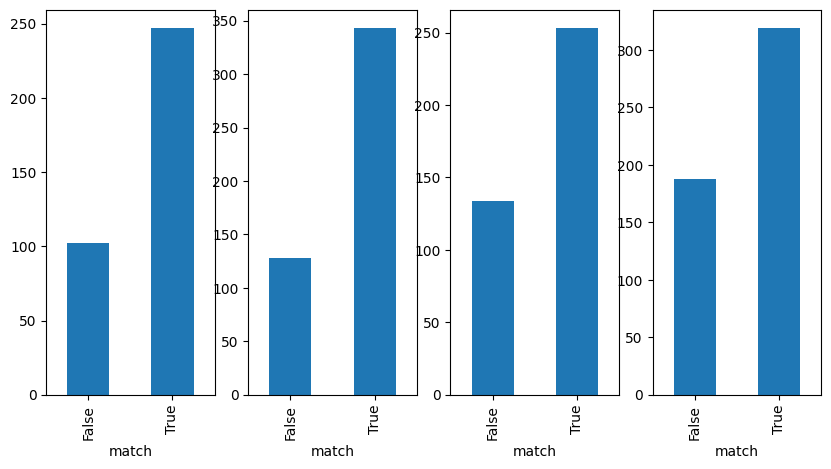

In [46]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(10, 5))

merged_little_mermaid.groupby('match').size().plot(kind='bar', ax=ax1)
merged_inception.groupby('match').size().plot(kind='bar', ax=ax2)
merged_thewitcher.groupby('match').size().plot(kind='bar', ax=ax3)
merged_wolf_of_wall_street.groupby('match').size().plot(kind='bar', ax=ax4)

plt.show()


In [24]:
merged_inception.dropna(inplace=True)
merged_little_mermaid.dropna(inplace=True)
merged_thewitcher.dropna(inplace=True)
merged_wolf_of_wall_street.dropna(inplace=True)

In [25]:
accuracy_inception = (merged_inception['match'].sum()) / len(merged_inception)
accuracy_little_mermaid = (merged_little_mermaid['match'].sum()) / len(merged_little_mermaid)
accuracy_thewitcher = (merged_thewitcher['match'].sum()) / len(merged_thewitcher)
accuracy_wolf_of_wall_street = (merged_wolf_of_wall_street['match'].sum()) / len(merged_wolf_of_wall_street)

In [336]:
print(f"Inception accuracy: {accuracy_inception}")
print(f"Little Mermaid accuracy: {accuracy_little_mermaid}")
print(f"The Witcher accuracy: {accuracy_thewitcher}")
print(f"Wolf of Wall Street accuracy: {accuracy_wolf_of_wall_street}")

Inception accuracy: 0.7282377919320594
Little Mermaid accuracy: 0.7077363896848138
The Witcher accuracy: 0.6537467700258398
Wolf of Wall Street accuracy: 0.6291913214990138
